 # <span style="color:blue"> M4U3: Feature Selection Project</span>
<span style="color:black">K. Tuba Turkcan Karaca </span>

In [ ]:
# !pip install mlxtend
# !pip install plotly_express
# !pip install rfpimp


import matplotlib.pyplot as plt
import mlxtend
import numpy as np
import pandas as pd
import plotly_express as px
import seaborn as sns


from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from numpy import mean
from numpy import std
from rfpimp import permutation_importances
from scipy import stats
from sklearn import preprocessing
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from IPython.core.pylabtools import figsize
figsize(14, 7)

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Filter Methods

### Classification Example (Parkinson's Disease)

####  Missing Value Ratio

In [98]:
df = pd.read_csv('pd_speech_features.csv')

In [99]:
# first 5 rows of the data
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [100]:
df.drop(['id'], axis=1, inplace=True)

In [101]:
df.shape

(756, 754)

In [102]:
#number of missing values in each variable
df.isnull().sum()

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

In [103]:
# percentage of missing values in each variable
df.isnull().sum()/len(df)*100

gender                       0.0
PPE                          0.0
DFA                          0.0
RPDE                         0.0
numPulses                    0.0
                            ... 
tqwt_kurtosisValue_dec_33    0.0
tqwt_kurtosisValue_dec_34    0.0
tqwt_kurtosisValue_dec_35    0.0
tqwt_kurtosisValue_dec_36    0.0
class                        0.0
Length: 754, dtype: float64

In [104]:
# saving missing values in a variable
missing_rates = df.isnull().sum()/len(df)*100

In [105]:
# saving column names in a variable
variables = df.columns

In [106]:
# new variable to store variables having missing values grater than a threshold
threshold = 25
variable = [ ]
for i in range(df.columns.shape[0]):
    if missing_rates[i] <= threshold:   
        variable.append(variables[i])

In [107]:
#variable

In [108]:
# creating a new dataframe using the above variables
df = df[variable]

In [109]:
# first five rows of the new data
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [110]:
# percentage of missing values in each variable of new data
df.isnull().sum()/len(df)*100

gender                       0.0
PPE                          0.0
DFA                          0.0
RPDE                         0.0
numPulses                    0.0
                            ... 
tqwt_kurtosisValue_dec_33    0.0
tqwt_kurtosisValue_dec_34    0.0
tqwt_kurtosisValue_dec_35    0.0
tqwt_kurtosisValue_dec_36    0.0
class                        0.0
Length: 754, dtype: float64

In [111]:
# shape of new  data
df.shape

(756, 754)

####  Low Variance Filter (Quasi-Constant Features)

In [128]:
data = pd.read_csv('pd_speech_features.csv')

In [129]:
#shape of the data
data.shape

(756, 755)

In [130]:
#data type of variables
data.dtypes

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

In [131]:
df_cont = data.select_dtypes(include=['float64','int64' ])

In [132]:
data=df_cont

In [133]:
normalize = normalize(data)

TypeError: 'numpy.ndarray' object is not callable

In [134]:
data_scaled = pd.DataFrame(normalize)

In [135]:
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,745,746,747,748,749,750,751,752,753,754
0,0.000000e+00,2.226476e-10,1.898004e-10,1.599189e-10,1.274146e-10,5.343543e-08,5.321278e-08,1.795326e-12,1.932581e-14,4.853718e-13,...,3.477756e-10,5.887917e-10,8.613346e-10,9.374579e-10,1.140423e-09,9.935651e-10,5.833813e-10,6.680320e-10,4.217057e-09,2.226476e-10
1,0.000000e+00,2.337639e-10,1.792642e-10,1.624215e-10,1.261530e-10,5.470075e-08,5.446699e-08,1.930482e-12,1.708814e-14,4.558396e-13,...,3.644146e-10,8.440513e-10,5.497075e-09,3.318559e-09,2.577504e-09,2.222674e-09,1.525193e-09,1.482788e-09,1.056099e-08,2.337639e-10
2,0.000000e+00,2.410781e-10,2.051165e-10,1.629784e-10,1.421927e-10,5.593011e-08,5.568904e-08,2.010492e-12,1.456112e-14,4.242974e-13,...,3.771184e-10,5.619048e-10,2.289253e-09,2.590577e-09,2.656126e-09,1.158766e-09,7.039239e-10,7.592754e-10,1.149123e-09,2.410781e-10
3,3.215034e-10,0.000000e+00,1.322054e-10,2.561482e-10,1.905133e-10,5.722761e-08,5.690610e-08,3.490798e-12,5.875121e-14,1.347099e-12,...,1.215444e-09,1.146610e-09,1.689758e-09,4.514004e-09,1.357870e-09,1.506469e-09,1.558006e-09,2.014219e-09,1.305400e-09,3.215034e-10
4,2.574309e-10,0.000000e+00,8.441158e-11,2.053835e-10,1.365104e-10,6.075368e-08,6.049625e-08,2.101041e-12,6.870477e-13,1.377255e-12,...,1.589043e-09,1.503808e-09,1.565308e-09,1.483342e-09,2.003250e-09,3.009135e-09,2.113585e-09,1.301545e-09,1.574550e-09,2.574309e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.734864e-08,0.000000e+00,5.614226e-11,3.910729e-11,1.969764e-11,2.893752e-08,2.886813e-08,3.210845e-13,3.622395e-15,4.441251e-14,...,2.130829e-10,2.095021e-10,2.165942e-10,1.729381e-10,2.487378e-10,2.456567e-10,2.345882e-10,2.220833e-10,4.765392e-10,0.000000e+00
752,1.952351e-08,0.000000e+00,1.256065e-11,4.412236e-11,4.622700e-11,3.240903e-08,3.225285e-08,3.553048e-13,1.718022e-14,1.116745e-13,...,1.538765e-10,1.362819e-10,1.427325e-10,1.950477e-10,4.137501e-10,3.328056e-10,4.923206e-10,8.516782e-10,2.219199e-09,0.000000e+00
753,2.003686e-08,0.000000e+00,7.055927e-11,5.774366e-11,3.737153e-11,3.041451e-08,3.033468e-08,4.046703e-13,8.194675e-15,6.066936e-14,...,4.115993e-09,3.549485e-09,2.088192e-09,5.035238e-10,2.283164e-10,2.024521e-10,2.824079e-10,2.677834e-10,4.025253e-10,0.000000e+00
754,2.630624e-08,0.000000e+00,8.780834e-11,7.848902e-11,5.221736e-11,3.563395e-08,3.552915e-08,5.951938e-13,5.774796e-15,9.642128e-14,...,2.008151e-09,1.344783e-09,9.373196e-10,2.310338e-10,2.043293e-10,2.060900e-10,2.808899e-10,2.969356e-10,3.891542e-10,0.000000e+00


In [136]:
data_scaled.var()

0      2.413054e-16
1      1.210448e-20
2      4.222603e-21
3      4.126481e-21
4      3.685867e-21
           ...     
750    7.840999e-18
751    8.140447e-18
752    6.902933e-18
753    3.579004e-17
754    9.220610e-21
Length: 755, dtype: float64

In [137]:
#storing the variance and name of variables
variance = data_scaled.var()
columns = data.columns
print(len(variance))

755


In [138]:
#saving the names of variables having variance more than a threshold value
threshold = 0.0000006 
variable = [ ]
for i in range(0,len(variance)):
    if variance[i] >= threshold :  
        variable.append(columns[i])

In [139]:
variable

['det_entropy_shannon_10_coef',
 'app_entropy_shannon_1_coef',
 'app_entropy_shannon_2_coef',
 'app_entropy_shannon_3_coef',
 'app_entropy_shannon_4_coef',
 'app_entropy_shannon_5_coef',
 'app_entropy_shannon_6_coef',
 'app_entropy_shannon_7_coef']

In [140]:
# creating a new dataframe using the above variables
new_data = data[variable]

In [141]:
new_data.head()

,det_entropy_shannon_10_coef,app_entropy_shannon_1_coef,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef
0,-2.336364e+03,-34415952.86,-41505780.29,-54991273.00,-7.977922e+07,-129684181.7,-232253303.7,-459058057.8
1,-5.323820e+01,-32588713.93,-39329560.14,-52167450.85,-7.573630e+07,-123243056.6,-220947833.1,-437011684.1
2,-7.653440e+01,-31864278.37,-38418848.45,-50880181.14,-7.373527e+07,-119780270.0,-214375881.7,-423881698.8
3,-4.571330e+06,-44854174.87,-50479679.82,-60032621.59,-7.660933e+07,-109696232.2,-176812107.4,-330129338.5
4,-2.089139e+07,-59737876.86,-66995068.86,-80313780.59,-1.003577e+08,-140671395.9,-225887933.1,-425927317.4


In [142]:
#variance of variables in new data
new_data.var()

det_entropy_shannon_10_coef    7.208845e+13
app_entropy_shannon_1_coef     2.975877e+15
app_entropy_shannon_2_coef     4.192088e+15
app_entropy_shannon_3_coef     7.136035e+15
app_entropy_shannon_4_coef     1.457343e+16
app_entropy_shannon_5_coef     3.762180e+16
app_entropy_shannon_6_coef     1.185112e+17
app_entropy_shannon_7_coef     4.569171e+17
dtype: float64

In [143]:
# shape of new and original data
new_data.shape, data.shape

((756, 8), (756, 755))

####  SelectKBest Algorithm

In [144]:
data = pd.read_csv('pd_speech_features.csv')

In [145]:
data.corr()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,1.000000,-0.133605,0.026667,0.041938,-0.084606,0.085828,0.085226,-0.100831,-0.060464,-0.052865,...,0.036897,0.016047,-0.023317,-0.045943,-0.041835,-0.053781,-0.058034,-0.057807,-0.055775,-0.111661
gender,-0.133605,1.000000,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,...,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828,0.182713
PPE,0.026667,0.010175,1.000000,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,...,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588,-0.072939
DFA,0.041938,0.099356,-0.094775,1.000000,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,...,-0.146325,-0.104456,-0.061129,-0.063451,-0.061845,-0.033914,0.043454,0.067843,0.116699,0.306070
RPDE,-0.084606,0.168321,-0.405558,0.155075,1.000000,-0.521193,-0.524839,0.506707,0.333545,0.614340,...,-0.315592,-0.278504,-0.148989,-0.101467,-0.098923,-0.097161,-0.036406,-0.018052,0.021945,0.247444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,-0.053781,0.107618,0.045755,-0.033914,-0.097161,-0.047946,-0.047837,0.039487,-0.092429,0.018504,...,0.239203,0.486570,0.708646,0.841365,0.945107,1.000000,0.824620,0.698738,0.543845,0.119808
tqwt_kurtosisValue_dec_34,-0.058034,0.128936,0.046175,0.043454,-0.036406,-0.068664,-0.068561,0.046140,-0.061721,0.027886,...,0.139668,0.383328,0.587449,0.667325,0.729501,0.824620,1.000000,0.948008,0.785141,0.192345
tqwt_kurtosisValue_dec_35,-0.057807,0.107734,0.037385,0.067843,-0.018052,-0.069645,-0.069468,0.040828,-0.067636,0.010553,...,0.054510,0.275390,0.477147,0.550686,0.609663,0.698738,0.948008,1.000000,0.866696,0.219454
tqwt_kurtosisValue_dec_36,-0.055775,0.104828,0.039588,0.116699,0.021945,-0.062925,-0.062790,0.031685,-0.067147,0.003805,...,-0.108280,0.070046,0.290106,0.386061,0.467944,0.543845,0.785141,0.866696,1.000000,0.279827


In [155]:
df.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [156]:
X_cla = df.iloc[:,:-1]
y_cla = df['class']

In [157]:
X_cla.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [158]:
X_cla.shape

(756, 753)

**chi-square**
Not working. It requires nonnegative values.

**f_classif**

ANOVA F-value between label/feature for classification tasks.

In [159]:
X= X_cla
y = y_cla

In [160]:
ordered_rank_features = SelectKBest(score_func=f_classif)
ordered_feature = ordered_rank_features.fit(X,y)

In [161]:
ordered_feature.scores_

array([2.60408429e+01, 4.03282883e+00, 7.79348885e+01, 4.91771861e+01,
       6.61783427e+01, 6.61511396e+01, 3.52614575e+01, 4.17874621e+00,
       3.28175607e+01, 3.00044631e+01, 2.33438594e+01, 2.80526881e+01,
       2.33397057e+01, 2.02432331e+01, 2.41701543e+01, 1.26095902e+01,
       1.71397689e+01, 4.11265278e+01, 1.26103821e+01, 9.61982949e+00,
       7.65889095e+00, 3.51112466e+01, 6.17910438e+01, 4.30694967e+01,
       5.28138649e+01, 7.36838042e+01, 4.73837564e+01, 1.81617058e+00,
       1.54537132e-01, 5.28913298e-01, 3.29505949e-01, 4.77434848e+00,
       2.96658705e+00, 1.10320151e+01, 1.89370615e+01, 1.10360998e+01,
       2.33773110e+01, 7.13751330e-01, 1.01995280e+01, 2.33534437e+01,
       3.74401843e+00, 1.04176073e+01, 5.72663399e+01, 3.96502716e+00,
       6.33065457e+01, 1.24889332e+01, 1.86588727e+00, 1.28249917e+00,
       3.64136071e+01, 2.12081050e+01, 8.68808346e-01, 3.49778370e+01,
       1.81260219e+01, 1.24708432e+01, 1.30354247e+01, 3.11320275e+01,
      

In [162]:
df_scores = pd.DataFrame(ordered_feature.scores_, columns=['Score'])

In [163]:
df_columns = pd.DataFrame(X.columns)

In [164]:
features_rank = pd.concat([df_columns, df_scores], axis=1)

In [165]:
features_rank.columns = ['Features', 'Score']

In [166]:
features_rank.head()

,Features,Score
0,gender,26.040843
1,PPE,4.032829
2,DFA,77.934889
3,RPDE,49.177186
4,numPulses,66.178343


In [167]:
features_rank.nlargest(10, 'Score')

,Features,Score
58,mean_MFCC_2nd_coef,142.506911
620,tqwt_minValue_dec_12,140.011407
584,tqwt_stdValue_dec_12,137.750103
656,tqwt_maxValue_dec_12,136.312113
583,tqwt_stdValue_dec_11,136.142253
404,tqwt_entropy_log_dec_12,128.039591
655,tqwt_maxValue_dec_11,126.070781
619,tqwt_minValue_dec_11,117.032224
621,tqwt_minValue_dec_13,116.085095
135,std_9th_delta_delta,115.403308


####  SelectPercentile

In [168]:
X = X_cla
y = y_cla

In [169]:
X.shape

(756, 753)

In [170]:
# select features based on top 20 percentile
sel_percent = SelectPercentile(score_func=f_classif, percentile=20)
ordered_feature = sel_percent.fit(X,y)

In [171]:
ordered_feature.scores_

array([2.60408429e+01, 4.03282883e+00, 7.79348885e+01, 4.91771861e+01,
       6.61783427e+01, 6.61511396e+01, 3.52614575e+01, 4.17874621e+00,
       3.28175607e+01, 3.00044631e+01, 2.33438594e+01, 2.80526881e+01,
       2.33397057e+01, 2.02432331e+01, 2.41701543e+01, 1.26095902e+01,
       1.71397689e+01, 4.11265278e+01, 1.26103821e+01, 9.61982949e+00,
       7.65889095e+00, 3.51112466e+01, 6.17910438e+01, 4.30694967e+01,
       5.28138649e+01, 7.36838042e+01, 4.73837564e+01, 1.81617058e+00,
       1.54537132e-01, 5.28913298e-01, 3.29505949e-01, 4.77434848e+00,
       2.96658705e+00, 1.10320151e+01, 1.89370615e+01, 1.10360998e+01,
       2.33773110e+01, 7.13751330e-01, 1.01995280e+01, 2.33534437e+01,
       3.74401843e+00, 1.04176073e+01, 5.72663399e+01, 3.96502716e+00,
       6.33065457e+01, 1.24889332e+01, 1.86588727e+00, 1.28249917e+00,
       3.64136071e+01, 2.12081050e+01, 8.68808346e-01, 3.49778370e+01,
       1.81260219e+01, 1.24708432e+01, 1.30354247e+01, 3.11320275e+01,
      

In [172]:
sel_percent.get_support()
# Selected best 20 percentile Features
X.columns[sel_percent.get_support()]

Index(['DFA', 'numPulses', 'numPeriodsPulses', 'minIntensity', 'f1',
       'VFER_mean', 'VFER_entropy', 'mean_MFCC_2nd_coef',
       'std_delta_log_energy', 'std_4th_delta',
       ...
       'tqwt_maxValue_dec_10', 'tqwt_maxValue_dec_11', 'tqwt_maxValue_dec_12',
       'tqwt_maxValue_dec_13', 'tqwt_maxValue_dec_14', 'tqwt_maxValue_dec_15',
       'tqwt_kurtosisValue_dec_26', 'tqwt_kurtosisValue_dec_27',
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_36'],
      dtype='object', length=151)

#### mutual_info_classif

In [173]:
X = X_cla
y = y_cla

In [174]:
mutual_info = mutual_info_classif(X, y)

In [175]:
mutual_data = pd.Series(mutual_info, index=X.columns)

In [176]:
mutual_data.sort_values(ascending=False)

tqwt_entropy_log_dec_35       0.107912
std_delta_delta_log_energy    0.104204
mean_MFCC_2nd_coef            0.097857
std_8th_delta_delta           0.095991
tqwt_TKEO_mean_dec_16         0.095862
                                ...   
tqwt_meanValue_dec_12         0.000000
mean_3rd_delta_delta          0.000000
tqwt_meanValue_dec_15         0.000000
mean_5th_delta_delta          0.000000
tqwt_entropy_log_dec_2        0.000000
Length: 753, dtype: float64

In [177]:
mutual_data.nlargest(10)

tqwt_entropy_log_dec_35        0.107912
std_delta_delta_log_energy     0.104204
mean_MFCC_2nd_coef             0.097857
std_8th_delta_delta            0.095991
tqwt_TKEO_mean_dec_16          0.095862
tqwt_entropy_shannon_dec_35    0.094599
tqwt_TKEO_std_dec_12           0.092897
tqwt_maxValue_dec_12           0.092545
tqwt_entropy_log_dec_11        0.092258
tqwt_stdValue_dec_12           0.090911
dtype: float64

### Regression Example (Residual Building)

In [178]:
df = pd.read_csv('Residential-Building-Data-Set.csv')

In [179]:
df.head()

,start_year,start_quarter,completion_year,completion_quarter,fin_v-1,fin_v-2,fin_v-3,fin_v-4,fin_v-5,fin_v-6,...,econ_lag5_v23,econ_lag5_v24,econ_lag5_v25,econ_lag5_v26,econ_lag5_v27,econ_lag5_v28,econ_lag5_v29,sale_price,construction_cost,profit
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410,1790
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000,4000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170,1030
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30,135
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700,4800


In [180]:
df.shape

(372, 110)

In [181]:
df.corr()

,start_year,start_quarter,completion_year,completion_quarter,fin_v-1,fin_v-2,fin_v-3,fin_v-4,fin_v-5,fin_v-6,...,econ_lag5_v23,econ_lag5_v24,econ_lag5_v25,econ_lag5_v26,econ_lag5_v27,econ_lag5_v28,econ_lag5_v29,sale_price,construction_cost,profit
start_year,1.000000,-0.122166,0.988406,0.053076,0.135501,0.089259,0.066719,0.336241,0.766044,-0.148846,...,0.874646,0.908291,0.974894,0.963712,0.870671,0.319821,0.902521,0.607124,0.753455,0.563963
start_quarter,-0.122166,1.000000,-0.057468,-0.198444,0.034600,-0.021322,-0.007892,-0.045533,-0.107190,-0.116201,...,-0.048692,-0.059118,-0.058505,-0.048561,-0.007638,-0.360814,-0.074340,-0.093030,-0.128630,-0.084434
completion_year,0.988406,-0.057468,1.000000,-0.020705,0.136519,0.100534,0.069694,0.349245,0.761857,-0.139225,...,0.870244,0.903366,0.964574,0.953593,0.868584,0.307949,0.887820,0.612665,0.768546,0.567875
completion_quarter,0.053076,-0.198444,-0.020705,1.000000,0.001165,0.062605,0.081924,0.054373,0.058812,0.050509,...,0.021815,0.034169,0.047685,0.046661,0.034662,0.020354,0.049801,-0.003542,0.061487,-0.013200
fin_v-1,0.135501,0.034600,0.136519,0.001165,1.000000,-0.229467,-0.138081,-0.286906,-0.313596,-0.618159,...,0.132935,0.121045,0.133298,0.130134,0.117845,0.005902,0.122142,-0.435081,-0.298949,-0.440403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
econ_lag5_v28,0.319821,-0.360814,0.307949,0.020354,0.005902,0.056163,0.045462,0.130504,0.278596,-0.018816,...,0.252196,0.252481,0.299772,0.304771,0.265156,1.000000,0.282434,0.209883,0.280362,0.191970
econ_lag5_v29,0.902521,-0.074340,0.887820,0.049801,0.122142,0.087300,0.080682,0.335104,0.791587,-0.178923,...,0.824477,0.727327,0.965223,0.968059,0.795363,0.282434,1.000000,0.606571,0.766440,0.561393
sale_price,0.607124,-0.093030,0.612665,-0.003542,-0.435081,0.254336,0.163545,0.512995,0.784986,0.192130,...,0.552106,0.510016,0.615417,0.614735,0.564113,0.209883,0.606571,1.000000,0.796041,0.995847
construction_cost,0.753455,-0.128630,0.768546,0.061487,-0.298949,0.253317,0.165161,0.602107,0.963322,0.308446,...,0.714637,0.610567,0.778310,0.779900,0.704738,0.280362,0.766440,0.796041,1.000000,0.737631


In [182]:
X_reg = df.iloc[:,:-3]
y_reg = df['profit']

In [183]:
X_reg.shape

(372, 107)

In [185]:
X_reg.head()

,start_year,start_quarter,completion_year,completion_quarter,fin_v-1,fin_v-2,fin_v-3,fin_v-4,fin_v-5,fin_v-6,...,econ_lag5_v20,econ_lag5_v21,econ_lag5_v22,econ_lag5_v23,econ_lag5_v24,econ_lag5_v25,econ_lag5_v26,econ_lag5_v27,econ_lag5_v28,econ_lag5_v29
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,15,733.800000,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,15,1143.800000,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,15,589.500000,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,12,197.679557,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,14,2220.600000,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5


In [186]:
X = X_reg
y = y_reg

####  SelectKBest Algorithm

**f_regression**

F-value between label/feature for regression tasks.

In [187]:
ordered_rank_features = SelectKBest(score_func=f_regression)
ordered_feature = ordered_rank_features.fit(X,y)

In [188]:
ordered_feature.scores_

array([1.72565280e+02, 2.65670434e+00, 1.76110662e+02, 6.44827802e-02,
       8.90313739e+01, 2.37568555e+01, 9.42458863e+00, 1.11805027e+02,
       4.24147242e+02, 1.07383976e+01, 4.78672287e+00, 5.98894331e+03,
       2.62193619e+01, 1.55572835e+02, 1.55519509e+02, 4.00858743e+01,
       1.65394750e+02, 1.10178511e+02, 1.29574226e+02, 3.92285004e+01,
       1.10920587e+02, 6.11869524e+01, 1.58739026e+02, 1.50778097e+02,
       1.19320521e+02, 1.05166062e+02, 1.70766161e+02, 1.69438440e+02,
       1.02906069e+02, 1.39251821e+01, 1.56467003e+02, 2.90857726e+01,
       1.56029119e+02, 1.59400855e+02, 3.02489599e+01, 1.60534007e+02,
       1.03038107e+02, 1.28030409e+02, 3.89662089e+01, 1.09135976e+02,
       4.80160315e+01, 1.59214315e+02, 1.45182714e+02, 1.25507566e+02,
       1.08474934e+02, 1.71277237e+02, 1.70654818e+02, 1.09032061e+02,
       1.23855002e+01, 1.53842735e+02, 1.80735498e+01, 1.58134193e+02,
       1.66954842e+02, 2.96265249e+01, 1.58221654e+02, 1.06971326e+02,
      

In [189]:
df_scores = pd.DataFrame(ordered_feature.scores_, columns=['Score'])

In [190]:
df_columns = pd.DataFrame(X.columns)

In [191]:
features_rank = pd.concat([df_columns, df_scores], axis=1)

In [192]:
features_rank.columns = ['Features', 'Score']

In [193]:
features_rank

,Features,Score
0,start_year,172.565280
1,start_quarter,2.656704
2,completion_year,176.110662
3,completion_quarter,0.064483
4,fin_v-1,89.031374
...,...,...
102,econ_lag5_v25,177.582944
103,econ_lag5_v26,176.661803
104,econ_lag5_v27,139.538488
105,econ_lag5_v28,14.157111


In [194]:
features_rank.nlargest(10, 'Score')

,Features,Score
11,fin_v-8,5988.943311
8,fin_v-5,424.147242
83,econ_lag4_v25,178.975162
102,econ_lag5_v25,177.582944
103,econ_lag5_v26,176.661803
2,completion_year,176.110662
84,econ_lag4_v26,175.519478
64,econ_lag3_v25,173.599735
65,econ_lag3_v26,173.209833
71,econ_lag4_v13,173.138286


#### mutual_info_regression

In [195]:
X = X_reg
y = y_reg

In [196]:
mutual_info = mutual_info_regression(X, y)

In [197]:
mutual_data = pd.Series(mutual_info, index=X.columns)

In [198]:
mutual_data.sort_values(ascending=False)

fin_v-8               1.890398
fin_v-5               0.525411
completion_year       0.472375
econ_lag2_v21         0.440867
start_year            0.435436
                        ...   
fin_v-2               0.033386
fin_v-3               0.024771
completion_quarter    0.022362
fin_v-7               0.000000
start_quarter         0.000000
Length: 107, dtype: float64

In [199]:
mutual_data.nlargest(10)

fin_v-8            1.890398
fin_v-5            0.525411
completion_year    0.472375
econ_lag2_v21      0.440867
start_year         0.435436
econ_lag1_v13      0.433224
econ_lag2_v29      0.424934
econ_lag1_v17      0.424168
econ_lag4_v29      0.424093
econ_lag2_v17      0.413857
dtype: float64

## Wrapper Methods

### Classification Example (Parkinson's Disease)

In [200]:
# define the dataset
X, y = make_classification(n_samples=1000, n_features=30, n_informative=20, n_redundant=10, random_state=42)

In [201]:
X.shape, y.shape

((1000, 30), (1000,))

#### Forward Selection 

In [204]:
X = X_cla
y = y_cla

In [205]:
# calling the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 4) #mean squared error
sfs1 = SequentialFeatureSelector(knn, k_features=4, forward=True, verbose=2, scoring='accuracy')

In [206]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [85]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(126,)","[0.8026315789473685, 0.7947019867549668, 0.827...",0.753904,"(std_delta_delta_log_energy,)",0.087938,0.068419,0.034209
2,"(126, 585)","[0.7763157894736842, 0.8344370860927153, 0.847...",0.801621,"(std_delta_delta_log_energy, tqwt_stdValue_dec...",0.044758,0.034823,0.017412
3,"(126, 354, 585)","[0.8026315789473685, 0.8410596026490066, 0.880...",0.818804,"(std_delta_delta_log_energy, tqwt_energy_dec_3...",0.053592,0.041696,0.020848
4,"(126, 324, 354, 585)","[0.8092105263157895, 0.8543046357615894, 0.887...",0.826743,"(std_delta_delta_log_energy, tqwt_energy_dec_3...",0.057196,0.0445,0.02225


In [86]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['std_delta_delta_log_energy', 'tqwt_energy_dec_3', 'tqwt_energy_dec_33', 'tqwt_stdValue_dec_12']


#### Backward Elimination

In [93]:
X = X_cla
y = y_cla

In [94]:
# calling the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 4)
sfs = SequentialFeatureSelector(knn, k_features=10, forward=False, verbose=2, scoring='accuracy')

In [95]:
sfs = sfs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 754 out of 754 | elapsed:   59.7s finished

[2021-04-23 19:44:51] Features: 753/10 -- score: 0.6561345416521436[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 753 out of 753 | elapsed:  1.1min finished

[2021-04-23 19:45:56] Features: 752/10 -- score: 0.6574590449634019[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 752 out of 752 | elapsed:  1.1min finished

[2021-04-23 19:47:02] Features: 751/10 -- score: 0.6600993377483444[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

In [ ]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

###  Exhaustive Feature Selector

In [221]:
X = X_cla
y = y_cla

In [222]:
X.shape, y.shape

((756, 753), (756,))

In [223]:
feature_names = X.columns

In [224]:
# calling the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 4)
efs = EFS(knn, 
           min_features=4,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

In [ ]:
efs = efs.fit(X, y, custom_feature_names=feature_names)

In [ ]:
print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (corresponding names):', efs.best_feature_names_)

In [ ]:
pd.DataFrame.from_dict(efs.get_metric_dict()).T

### Regression Example (Residual Building)

In [209]:
X = X_reg
y = y_reg

In [210]:
X.shape, y.shape

((372, 107), (372,))

#### Forward Selection 

In [211]:
# calling the linear regression model
lreg = LinearRegression()
sfs1 = SequentialFeatureSelector(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [212]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed:    0.9s finished

[2021-04-24 10:50:22] Features: 1/4 -- score: -74155.68585873209[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 106 out of 106 | elapsed:    0.7s finished

[2021-04-24 10:50:23] Features: 2/4 -- score: -62398.66960746271[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    0.7s finished

[2021-04-24 10:50:23] Features: 3/4 -- score: -60901.18558150113[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [213]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[-226268.7239252376, -81184.36438768967, -2135...",-74155.685859,"(fin_v-8,)",102726.776675,79924.92222,39962.46111
2,"(11, 97)","[-188895.16181798445, -61434.9049297618, -2744...",-62398.669607,"(fin_v-8, econ_lag5_v20)",84042.659193,65388.044058,32694.022029
3,"(11, 58, 97)","[-182043.54080017714, -60118.15841272301, -259...",-60901.185582,"(fin_v-8, econ_lag3_v19, econ_lag5_v20)",80417.01175,62567.167172,31283.583586
4,"(11, 58, 74, 97)","[-176332.0305187759, -36148.64810798635, -1793...",-51671.371828,"(fin_v-8, econ_lag3_v19, econ_lag4_v16, econ_l...",80866.185168,62916.639351,31458.319675


In [214]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['fin_v-8', 'econ_lag3_v19', 'econ_lag4_v16', 'econ_lag5_v20']


#### Backward Elimination

In [215]:
X = X_reg
y = y_reg

In [216]:
X.shape, y.shape

((372, 107), (372,))

In [217]:
# calling the linear regression model
lreg = LinearRegression()
sfs = SequentialFeatureSelector(lreg, k_features=4, forward=False, verbose=2, scoring='neg_mean_squared_error')

In [218]:
sfs = sfs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 107 out of 107 | elapsed:    1.8s finished

[2021-04-24 10:53:11] Features: 106/4 -- score: -55769.05612755006[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 106 out of 106 | elapsed:    1.7s finished

[2021-04-24 10:53:13] Features: 105/4 -- score: -47169.768430378266[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    1.7s finished

[2021-04-24 10:53:15] Features: 104/4 -- score: -44705.49179167389[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

In [219]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
107,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-158164.6591292486, -292080.93033949425, -199...",-111267.579189,"(start_year, start_quarter, completion_year, c...",134461.443138,104615.570859,52307.785429
106,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-159158.2485344289, -53100.28646927302, -1752...",-55769.056128,"(start_year, start_quarter, completion_year, c...",69318.077057,53931.818913,26965.909457
105,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-152973.43568395646, -35914.37390219478, -116...",-47169.76843,"(start_year, start_quarter, completion_year, c...",69083.804108,53749.5466,26874.7733
104,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-143774.58970523343, -36146.875948861656, -12...",-44705.491792,"(start_year, start_quarter, completion_year, c...",64769.672042,50393.005288,25196.502644
103,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-142765.31042628232, -36270.35758347234, -102...",-43602.90887,"(start_year, start_quarter, completion_year, c...",64904.343445,50497.784214,25248.892107
...,...,...,...,...,...,...,...
8,"(8, 11, 33, 54, 74, 76, 85, 92)","[-142246.7984106417, -41479.20253112264, -1008...",-42623.832454,"(fin_v-5, fin_v-8, econ_lag2_v13, econ_lag3_v1...",65945.659025,51307.963112,25653.981556
7,"(8, 11, 33, 54, 74, 76, 92)","[-147646.9850916462, -44023.348423656804, -108...",-44621.923638,"(fin_v-5, fin_v-8, econ_lag2_v13, econ_lag3_v1...",68307.133683,53145.270624,26572.635312
6,"(8, 11, 33, 54, 74, 92)","[-152665.26258221903, -46228.232183521905, -10...",-46167.578882,"(fin_v-5, fin_v-8, econ_lag2_v13, econ_lag3_v1...",70706.594194,55012.132419,27506.066209
5,"(8, 11, 54, 74, 92)","[-165393.07469650786, -50194.61469765525, -119...",-49451.028367,"(fin_v-5, fin_v-8, econ_lag3_v15, econ_lag4_v1...",77111.506121,59995.371494,29997.685747


In [220]:
feat_names = list(sfs.k_feature_names_)
print(feat_names)

['fin_v-8', 'econ_lag3_v15', 'econ_lag4_v16', 'econ_lag5_v15']


###  Exhaustive Feature Selector

In [225]:
X = X_reg
y = y_reg

In [226]:
X.shape, y.shape

((372, 107), (372,))

In [227]:
feature_names = X.columns

In [228]:
# calling the linear regression model
lreg = LinearRegression()
efs = EFS(lreg, 
           min_features=4,
           max_features=4,
           scoring='neg_mean_squared_error',
           print_progress=True,
           cv=5)

In [229]:
efs = efs.fit(X, y, custom_feature_names=feature_names)

KeyboardInterrupt: 

In [ ]:
print('Best subset (corresponding names):', efs.best_feature_names_)

In [ ]:
pd.DataFrame.from_dict(efs.get_metric_dict()).T

##  Embedded Methods 

### Classification Example (Parkinson's Disease)

####  Random Forest Importance

In [251]:
X = X_cla
y = y_cla

In [252]:
# instantiate the classifier with n_estimators = 10
model = RandomForestClassifier(n_estimators=10, random_state=42)

In [253]:
# fit the classifier to the training set
model.fit(X,y)

RandomForestClassifier(n_estimators=10, random_state=42)

In [254]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

tqwt_energy_dec_11               0.026927
tqwt_TKEO_mean_dec_12            0.025488
std_delta_delta_log_energy       0.021503
app_LT_entropy_shannon_6_coef    0.019799
tqwt_TKEO_std_dec_8              0.017771
                                   ...   
app_det_TKEO_mean_1_coef         0.000000
app_det_TKEO_mean_4_coef         0.000000
app_det_TKEO_mean_5_coef         0.000000
app_det_TKEO_mean_6_coef         0.000000
tqwt_entropy_shannon_dec_20      0.000000
Length: 753, dtype: float64

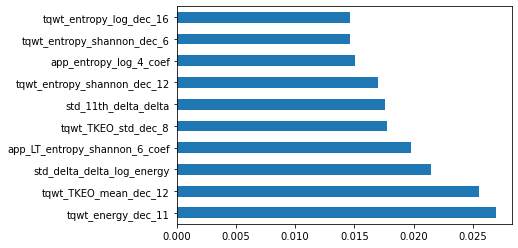

In [255]:
feature_scores.nlargest(10).plot(kind='barh')
plt.show()

In [256]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.02
sfm = SelectFromModel(model, threshold=0.02)

In [257]:
# Train the selector
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=42),
                threshold=0.02)

In [258]:
feat_labels = X.columns

In [259]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

std_delta_delta_log_energy
tqwt_energy_dec_11
tqwt_TKEO_mean_dec_12


### Regression Example (Residual Building)

#### Random Forest Importance

In [261]:
X = X_reg
y = y_reg

In [262]:
model = RandomForestRegressor(n_estimators=10, random_state=42)

In [263]:
# fit the classifier to the training set
model.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=42)

In [264]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

fin_v-8          9.579401e-01
fin_v-7          4.196899e-03
econ_lag1_v18    2.836799e-03
econ_lag4_v27    2.584039e-03
fin_v-5          2.400831e-03
                     ...     
econ_lag5_v23    2.746839e-06
econ_lag3_v20    2.017169e-06
econ_lag4_v12    1.424468e-06
econ_lag4_v23    6.945635e-07
econ_lag3_v15    5.306374e-07
Length: 107, dtype: float64

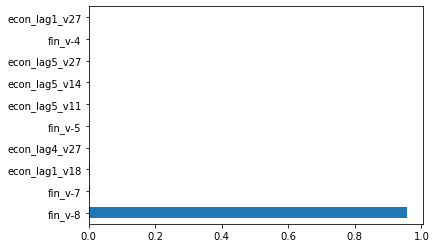

In [265]:
feature_scores.nlargest(10).plot(kind='barh')
plt.show()

In [266]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.05
sfm = SelectFromModel(model, threshold=0.05)

In [267]:
# Train the selector
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=10,
                                                random_state=42),
                threshold=0.05)

In [268]:
feat_labels = X.columns

In [269]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

fin_v-8
